In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


In [2]:
df = pd.read_csv("CDC Places 2023 Health Outcomes.csv")
df = df[df['zcta5']>= 10000]
df

,zcta5,total_population,access2_crudeprev,access2_crude95ci,arthritis_crudeprev,arthritis_crude95ci,binge_crudeprev,binge_crude95ci,bphigh_crudeprev,bphigh_crude95ci,...,selfcare_crudeprev,selfcare_crude95ci,indeplive_crudeprev,indeplive_crude95ci,disability_crudeprev,disability_crude95ci,location_lon,location_lat,standardized_date,resume_row_identifier
2396,10001,21102,5.1,"( 4.4, 6.0)",15.5,"(14.2, 16.9)",21.7,"(19.5, 24.0)",20.8,"(19.2, 22.4)",...,2.4,"( 2.2, 2.7)",5.4,"( 4.8, 6.1)",21.1,"(19.2, 23.1)",-73.996348,40.748341,1/1/2023,2396
2397,10002,81410,13.2,"(11.7, 14.8)",20.2,"(18.5, 21.9)",14.3,"(12.8, 16.0)",30.1,"(28.1, 32.3)",...,5.9,"( 5.4, 6.4)",10.9,"( 9.9, 11.9)",34.7,"(32.4, 37.3)",-73.986245,40.715801,1/1/2023,2397
2398,10003,56024,4.1,"( 3.5, 4.8)",13.3,"(12.1, 14.5)",24.5,"(22.1, 27.1)",16.7,"(15.4, 18.2)",...,1.6,"( 1.5, 1.8)",4.5,"( 4.0, 5.0)",18.1,"(16.3, 20.1)",-73.989181,40.731829,1/1/2023,2398
2399,10004,3089,2.8,"( 2.3, 3.5)",9.7,"( 8.7, 10.7)",26.7,"(24.0, 29.4)",13.1,"(11.9, 14.3)",...,1.0,"( 0.9, 1.1)",2.9,"( 2.6, 3.3)",12.5,"(11.1, 13.9)",-74.019138,40.688775,1/1/2023,2399
2400,10005,7135,3.3,"( 2.6, 4.7)",6.7,"( 5.9, 7.5)",28.1,"(25.4, 31.0)",9.6,"( 8.7, 10.7)",...,0.8,"( 0.7, 1.0)",3.2,"( 2.7, 4.0)",12.7,"(11.1, 15.1)",-74.008770,40.705977,1/1/2023,2400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404,99923,87,6.5,"( 4.6, 9.0)",29.0,"(24.3, 34.0)",17.5,"(14.3, 21.1)",33.0,"(28.3, 38.1)",...,2.9,"( 2.3, 3.5)",5.3,"( 4.2, 6.5)",23.8,"(19.4, 28.7)",-130.041834,55.979251,1/1/2023,32404
32405,99925,819,12.0,"(10.0, 14.5)",28.6,"(24.3, 33.0)",17.2,"(13.9, 20.8)",35.3,"(30.6, 39.9)",...,5.0,"( 4.4, 5.6)",9.5,"( 8.2, 10.8)",34.3,"(29.9, 38.8)",-132.959997,55.549834,1/1/2023,32405
32406,99926,1460,13.9,"(11.2, 17.0)",25.9,"(22.0, 30.0)",18.6,"(15.2, 22.4)",34.0,"(29.5, 38.3)",...,5.5,"( 4.7, 6.3)",11.2,"( 9.7, 12.7)",38.3,"(33.5, 43.1)",-131.494705,55.129324,1/1/2023,32406
32407,99927,94,12.4,"( 9.9, 15.2)",28.4,"(24.1, 33.0)",17.5,"(14.2, 21.2)",36.4,"(31.6, 41.1)",...,5.4,"( 4.6, 6.3)",8.9,"( 7.6, 10.2)",32.9,"(28.4, 37.6)",-133.511342,56.263852,1/1/2023,32407


In [3]:
df2 = pd.read_csv('ACS Socio-Demographics Curation_2023.csv')
filtered_df2 = df2[df2['county_name'] == 'Bronx County']
filtered_df2

,zip_code,po_name,zcta,county_fips,county_name,state,pop,households,hh_income,average_age,...,hh_ratio_40_50,hh_ratio_50_or_more,hh_ratio_na,hh_value_to_income_count,hh_value_to_income_2_or_less,hh_value_to_income_2_to_3,hh_value_to_income_3_to_4,hh_value_to_income_4_or_more,hh_value_to_income_na,resume_row_identifier
0,10451,Bronx,10451,36005,Bronx County,NY,50118.0,20434.0,51.203631,36.205874,...,1645.0,5759.0,557.0,2872.0,1598.0,328.0,278.0,659.0,9.0,3349
1,10452,Bronx,10452,36005,Bronx County,NY,79838.0,27940.0,45.178686,34.145069,...,2882.0,9465.0,1170.0,759.0,279.0,85.0,67.0,328.0,0.0,3350
2,10453,Bronx,10453,36005,Bronx County,NY,80393.0,27864.0,48.193547,34.242795,...,2403.0,8733.0,1698.0,1385.0,229.0,196.0,113.0,845.0,2.0,3351
3,10454,Bronx,10454,36005,Bronx County,NY,38908.0,14259.0,39.272214,34.028041,...,1186.0,4691.0,604.0,657.0,19.0,41.0,74.0,523.0,0.0,3352
4,10455,Bronx,10455,36005,Bronx County,NY,42781.0,15673.0,44.173579,33.502443,...,1120.0,5274.0,528.0,1426.0,411.0,141.0,131.0,743.0,0.0,3353
5,10456,Bronx,10456,36005,Bronx County,NY,90314.0,31718.0,43.217495,34.174751,...,2337.0,10264.0,1304.0,1788.0,414.0,204.0,147.0,1020.0,3.0,3354
6,10457,Bronx,10457,36005,Bronx County,NY,79443.0,25682.0,50.463652,32.653059,...,2455.0,8430.0,1080.0,1560.0,478.0,316.0,118.0,601.0,47.0,3355
7,10458,Bronx,10458,36005,Bronx County,NY,86757.0,29090.0,50.830440,32.605824,...,2665.0,9000.0,1161.0,993.0,218.0,86.0,85.0,604.0,0.0,3356
8,10459,Bronx,10459,36005,Bronx County,NY,51303.0,17453.0,51.658741,35.029569,...,1354.0,5095.0,742.0,2126.0,340.0,247.0,351.0,1150.0,38.0,3357
9,10460,Bronx,10460,36005,Bronx County,NY,59979.0,21480.0,48.672486,35.655163,...,1586.0,7296.0,971.0,2308.0,494.0,312.0,223.0,1279.0,0.0,3358


In [4]:
merged_df = pd.merge(df, filtered_df2, left_on='zcta5', right_on='zip_code', how='inner')
merged_df

,zcta5,total_population,access2_crudeprev,access2_crude95ci,arthritis_crudeprev,arthritis_crude95ci,binge_crudeprev,binge_crude95ci,bphigh_crudeprev,bphigh_crude95ci,...,hh_ratio_40_50,hh_ratio_50_or_more,hh_ratio_na,hh_value_to_income_count,hh_value_to_income_2_or_less,hh_value_to_income_2_to_3,hh_value_to_income_3_to_4,hh_value_to_income_4_or_more,hh_value_to_income_na,resume_row_identifier_y
0,10451,45713,18.7,"(16.7, 20.8)",19.9,"(18.1, 21.8)",12.6,"(10.9, 14.4)",34.0,"(31.7, 36.3)",...,1645.0,5759.0,557.0,2872.0,1598.0,328.0,278.0,659.0,9.0,3349
1,10452,75371,20.9,"(18.7, 23.1)",17.5,"(15.9, 19.3)",13.5,"(11.7, 15.4)",31.1,"(29.0, 33.4)",...,2882.0,9465.0,1170.0,759.0,279.0,85.0,67.0,328.0,0.0,3350
2,10453,78309,21.0,"(19.0, 23.2)",17.8,"(16.1, 19.6)",13.3,"(11.6, 15.2)",31.6,"(29.5, 33.9)",...,2403.0,8733.0,1698.0,1385.0,229.0,196.0,113.0,845.0,2.0,3351
3,10454,37337,25.0,"(22.2, 27.8)",18.9,"(17.2, 20.6)",12.8,"(11.1, 14.7)",32.6,"(30.4, 34.9)",...,1186.0,4691.0,604.0,657.0,19.0,41.0,74.0,523.0,0.0,3352
4,10455,39665,23.6,"(21.2, 26.3)",18.1,"(16.4, 19.9)",13.2,"(11.5, 15.0)",31.5,"(29.3, 33.8)",...,1120.0,5274.0,528.0,1426.0,411.0,141.0,131.0,743.0,0.0,3353
5,10456,86547,19.8,"(17.9, 21.8)",19.1,"(17.4, 20.9)",12.8,"(11.2, 14.7)",33.9,"(31.6, 36.2)",...,2337.0,10264.0,1304.0,1788.0,414.0,204.0,147.0,1020.0,3.0,3354
6,10457,70496,21.3,"(19.1, 23.5)",18.1,"(16.4, 19.9)",13.1,"(11.4, 15.0)",31.9,"(29.7, 34.2)",...,2455.0,8430.0,1080.0,1560.0,478.0,316.0,118.0,601.0,47.0,3355
7,10458,79492,19.6,"(17.5, 21.7)",16.0,"(14.5, 17.7)",14.5,"(12.7, 16.6)",28.1,"(26.0, 30.3)",...,2665.0,9000.0,1161.0,993.0,218.0,86.0,85.0,604.0,0.0,3356
8,10459,47308,21.4,"(19.1, 23.7)",17.8,"(16.2, 19.6)",13.3,"(11.6, 15.2)",31.3,"(29.2, 33.5)",...,1354.0,5095.0,742.0,2126.0,340.0,247.0,351.0,1150.0,38.0,3357
9,10460,57311,21.2,"(19.0, 23.5)",18.3,"(16.7, 20.2)",13.1,"(11.5, 15.0)",31.8,"(29.6, 34.1)",...,1586.0,7296.0,971.0,2308.0,494.0,312.0,223.0,1279.0,0.0,3358


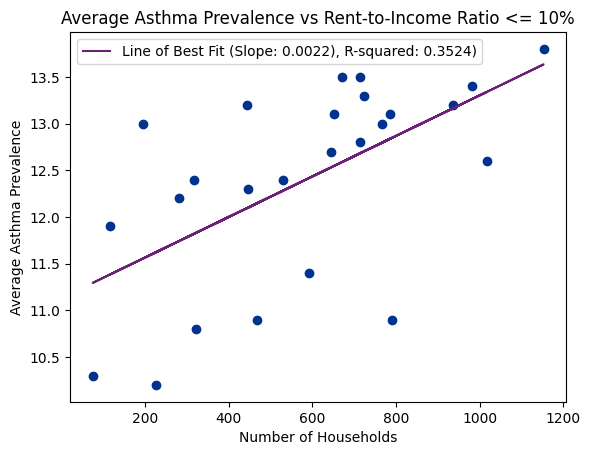

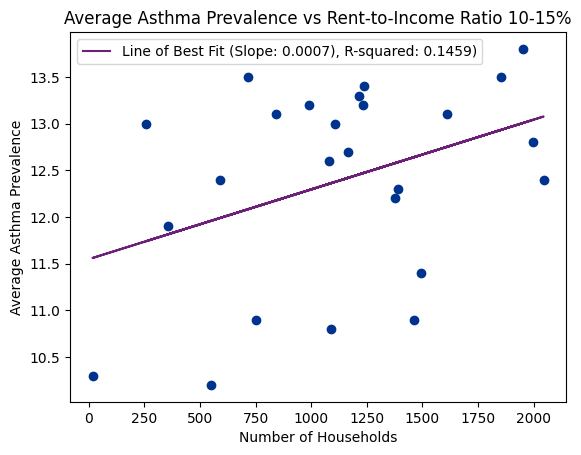

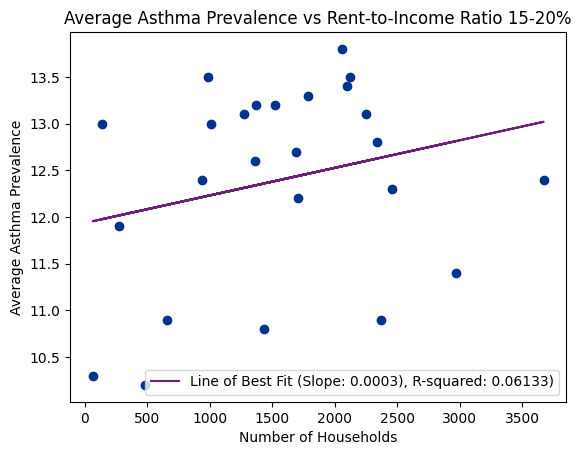

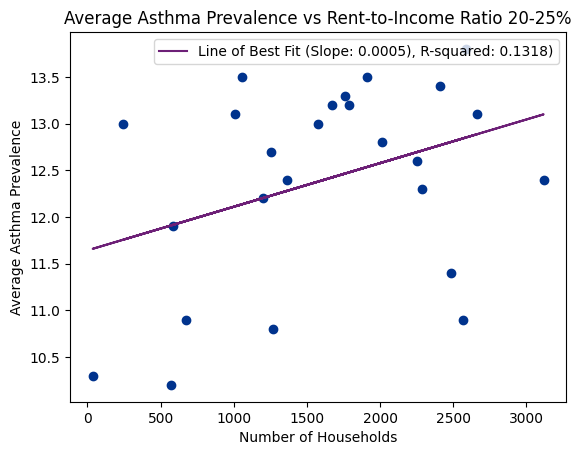

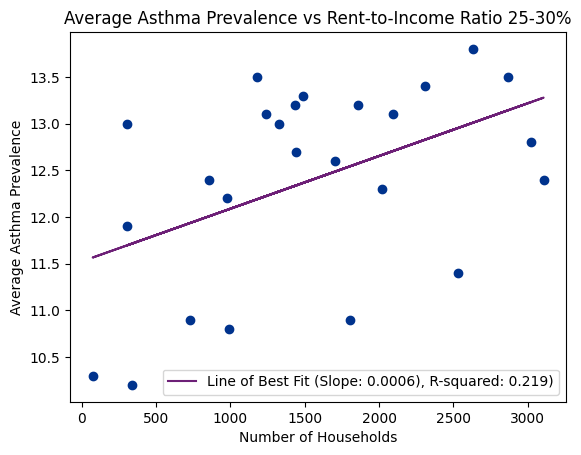

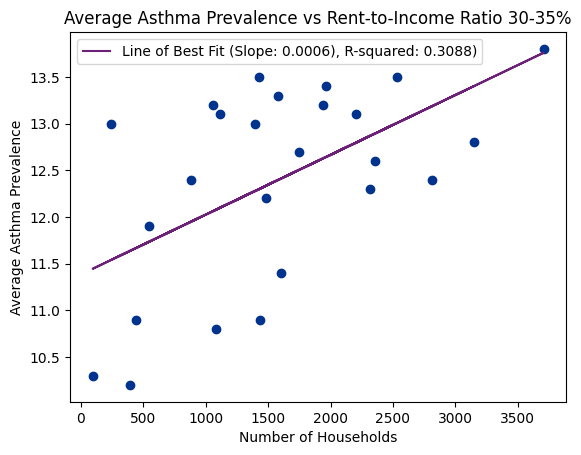

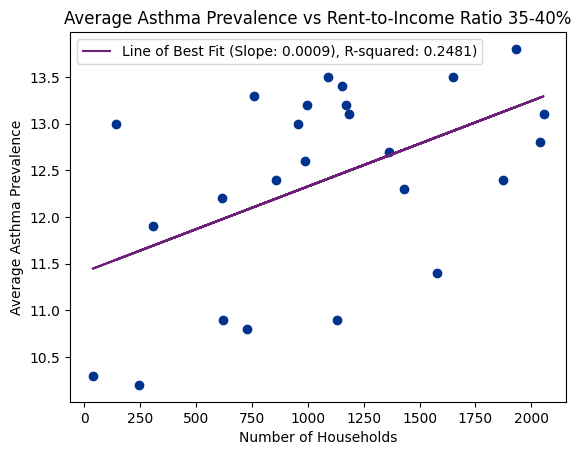

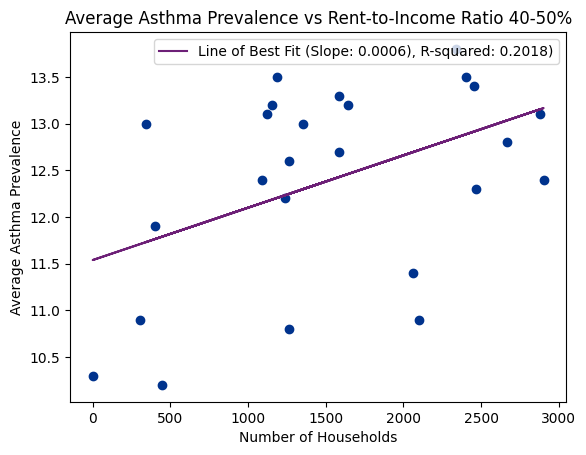

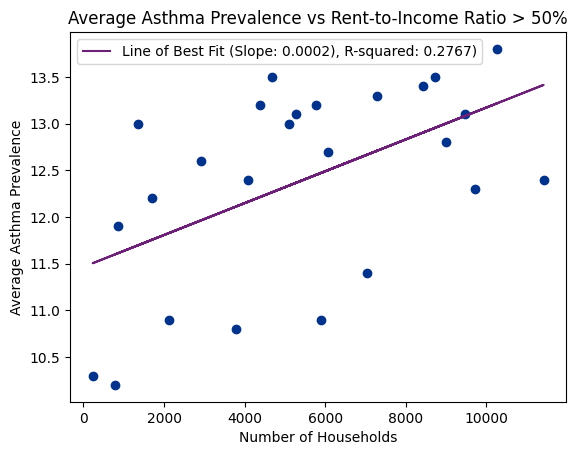

In [5]:
import numpy as np
from scipy.stats import linregress
import pandas as pd
import matplotlib.pyplot as plt

# Define column renaming mapping
column_name_mapping = {
    'hh_ratio_10_or_less': 'Rent-to-Income Ratio <= 10%',
    'hh_ratio_10_15': 'Rent-to-Income Ratio 10-15%',
    'hh_ratio_15_20': 'Rent-to-Income Ratio 15-20%',
    'hh_ratio_20_25': 'Rent-to-Income Ratio 20-25%',
    'hh_ratio_25_30': 'Rent-to-Income Ratio 25-30%',
    'hh_ratio_30_35': 'Rent-to-Income Ratio 30-35%',
    'hh_ratio_35_40': 'Rent-to-Income Ratio 35-40%',
    'hh_ratio_40_50': 'Rent-to-Income Ratio 40-50%',
    'hh_ratio_50_or_more': 'Rent-to-Income Ratio > 50%'
}

# Define income columns to use
rent_to_income_cols = list(column_name_mapping.keys())

# Create the scatterplot for each income column
for col in rent_to_income_cols:
    # Create a scatterplot
    plt.scatter(merged_df[col], merged_df['casthma_crudeprev'], c=["#00338D"])

    # Add label and title
    plt.xlabel('Number of Households')
    plt.ylabel('Average Asthma Prevalence')
    plt.title(f'Average Asthma Prevalence vs {column_name_mapping[col]}')

    # Calculate the coefficients (slope and intercept) for the line of best fit
    coefficients = np.polyfit(merged_df[col], merged_df['casthma_crudeprev'], 1)

    # Extract the slope from the coefficients
    slope = coefficients[0]

    # Calculate the R-squared value
    slope, intercept, r_value, p_value, std_err = linregress(merged_df[col], merged_df['casthma_crudeprev'])
    r_squared = r_value ** 2

    # Add the line of best fit to the scatter plot
    plt.plot(merged_df[col], slope * merged_df[col] + intercept, color='#6D2077', label=f'Line of Best Fit (Slope: {slope:.4f}), R-squared: {r_squared:.04})')

    # Display legend
    plt.legend()

    # Display plot
    plt.show()


In [6]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Define column renaming mapping
# column_name_mapping = {
#     'hh_ratio_10_or_less': 'Rent-to-Income Ratio <= 10%',
#     'hh_ratio_10_15': 'Rent-to-Income Ratio 10-15%',
#     'hh_ratio_15_20': 'Rent-to-Income Ratio 15-20%',
#     'hh_ratio_20_25': 'Rent-to-Income Ratio 20-25%',
#     'hh_ratio_25_30': 'Rent-to-Income Ratio 25-30%',
#     'hh_ratio_30_35': 'Rent-to-Income Ratio 30-35%',
#     'hh_ratio_35_40': 'Rent-to-Income Ratio 35-40%',
#     'hh_ratio_40_50': 'Rent-to-Income Ratio 40-50%',
#     'hh_ratio_50_or_more': 'Rent-to-Income Ratio > 50%'
# }

# # Group by zip code and calculate the mean (average) of chosen columns
# grouped_df1 = merged_df.groupby('zcta')[rent_to_income_cols1].agg(np.mean).reset_index()
# grouped_df2 = merged_df.groupby('zcta')[rent_to_income_cols2].agg(np.mean).reset_index()
# # Define income columns to use
# rent_to_income_cols = list(column_name_mapping.keys())

# # Create the scatterplot for each income column

# # Define the number of rows and columns for the plot matrix
# n_rows = 2  # Change to desired number of rows
# n_cols = 5  # Change to desired number of columns

# # Create the figure and the plot matrix
# fig, axs = plt.subplots(n_rows, n_cols, figsize=(28, 10))

# # Define the color for each income column
# colors = ['#00338D', '#00338D', '#00338D', '#00338D', '#00338D', '#00338D', '#00338D', '#00338D', '#00338D']

# # Iterate through each cell of the plot matrix
# for i in range(n_rows):
#     for j in range(n_cols):
#         # Calculate the index of the income column to use
#         k = i * n_cols + j

#         # Check if the index is valid, i.e., within the range of rent_to_income_cols and the column has non-null values
#         if k < len(rent_to_income_cols) and not merged_df[rent_to_income_cols[k]].isnull().all():
#             # Extract the data for the scatter plot
#             x = merged_df[rent_to_income_cols[k]]
#             y = merged_df['casthma_crudeprev']
            
#             # Create a scatter plot
#             axs[i, j].scatter(x, y, c=colors[k])

#             # Add label and title for each plot
#             axs[i, j].set_xlabel('Number of Households')
#             axs[i, j].set_ylabel('Average Asthma Prevalance')
#             axs[i, j].set_title(f'Average Asthma Prevalence vs {column_name_mapping[rent_to_income_cols[k]]}')

#             # Calculate the coefficients (slope and intercept) for the line of best fit
#             coefficients = np.polyfit(x, y, 1)

#             # Extract the slope from the coefficients
#             slope = coefficients[0]

#             # Calculate the R-squared value
#             slope, intercept, r_value, p_value, std_err = linregress(x, y)
#             r_squared = r_value ** 2
#             print(f'{column_name_mapping[rent_to_income_cols[k]]}: R-Squared: {r_squared}')

#             # Add the line of best fit to the scatter plot
#             axs[i, j].plot(x, slope * x + intercept, color='#6D2077', label=f'R-squared: {r_squared:.4f}')

#             # Display legend
#             axs[i, j].legend()

# # Adjust the padding between subplots
# fig.tight_layout(pad=2)

# # Display plot
# plt.show()


Rent-to-Income Ratio up to 30%: R-Squared: 0.166935464873446
Rent-to-Income Ratio 30% and over: R-Squared: 0.2844083907627091


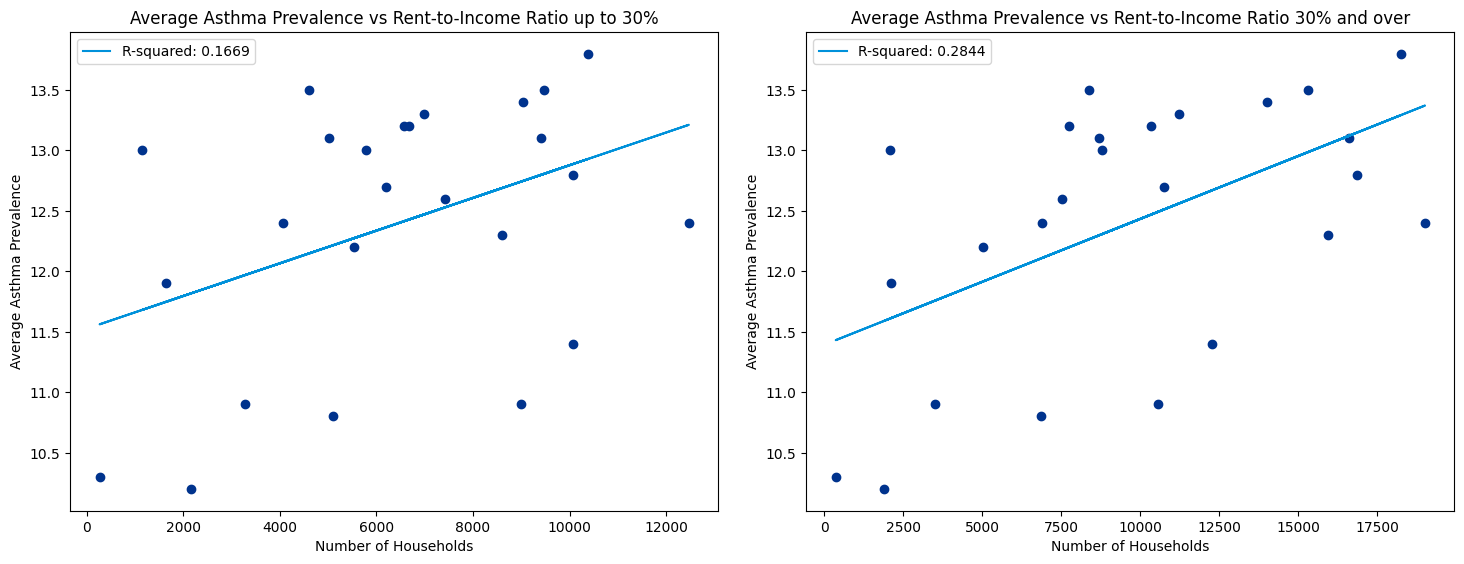

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define column renaming mapping and group columns
column_name_mapping = {
    'hh_ratio_10_or_less': 'Rent-to-Income Ratio <= 10%',
    'hh_ratio_10_15': 'Rent-to-Income Ratio 10-15%',
    'hh_ratio_15_20': 'Rent-to-Income Ratio 15-20%',
    'hh_ratio_20_25': 'Rent-to-Income Ratio 20-25%',
    'hh_ratio_25_30': 'Rent-to-Income Ratio 25-30%',
    'hh_ratio_30_35': 'Rent-to-Income Ratio 30-35%',
    'hh_ratio_35_40': 'Rent-to-Income Ratio 35-40%',
    'hh_ratio_40_50': 'Rent-to-Income Ratio 40-50%',
    'hh_ratio_50_or_more': 'Rent-to-Income Ratio > 50%'
}

rent_to_income_cols = list(column_name_mapping.keys())
rent_to_income_up_to_30 = rent_to_income_cols[:5]
rent_to_income_30_and_over = rent_to_income_cols[5:]

# Calculate the sums of the two groups
merged_df['up_to_30'] = merged_df[rent_to_income_up_to_30].sum(axis=1)
merged_df['30_and_over'] = merged_df[rent_to_income_30_and_over].sum(axis=1)

# Create the scatterplot for the two categories
categories = ['up_to_30', '30_and_over']
colors = ['#00338D', '#00338D']

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

for i, category in enumerate(categories):
    x = merged_df[category]
    y = merged_df['casthma_crudeprev']
    
    axs[i].scatter(x, y, c=colors[i])
    axs[i].set_xlabel('Number of Households')
    axs[i].set_ylabel('Average Asthma Prevalence')
    
    if i == 0:
        title = "Rent-to-Income Ratio up to 30%"
    else:
        title = "Rent-to-Income Ratio 30% and over"
        
    axs[i].set_title(f'Average Asthma Prevalence vs {title}')
    
    coefficients = np.polyfit(x, y, 1)
    slope = coefficients[0]
    
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    r_squared = r_value ** 2
    print(f'{title}: R-Squared: {r_squared}')
    
    axs[i].plot(x, slope * x + intercept, color='#0091DA', label=f'R-squared: {r_squared:.4f}')
    axs[i].legend()

# Adjust the padding between subplots
fig.tight_layout(pad=2)

# Display plot
plt.show()

In [8]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Define column renaming mapping
# column_name_mapping = {
#     'hh_ratio_10_or_less': 'Rent-to-Income Ratio <= 10%',
#     'hh_ratio_10_15': 'Rent-to-Income Ratio 10-15%',
#     'hh_ratio_15_20': 'Rent-to-Income Ratio 15-20%',
#     'hh_ratio_20_25': 'Rent-to-Income Ratio 20-25%',
#     'hh_ratio_25_30': 'Rent-to-Income Ratio 25-30%',
#     'hh_ratio_30_35': 'Rent-to-Income Ratio 30-35%',
#     'hh_ratio_35_40': 'Rent-to-Income Ratio 35-40%',
#     'hh_ratio_40_50': 'Rent-to-Income Ratio 40-50%',
#     'hh_ratio_50_or_more': 'Rent-to-Income Ratio > 50%'
# }

# # Define income columns to use
# income_cols = list(column_name_mapping.keys())

# # Group by zip code and calculate the mean (average) of chosen columns
# grouped_df = merged_df.groupby('zcta')[income_cols].agg(np.mean).reset_index()

# # Define custom colors for the bar chart
# colors = ['#00338D', '#ACEAFF', '#1E49E2', '#00B8F5', '#7213EA', '#B497FF', '#FD349C', '#FFA3DA', '#00C0AE']

# # Create a bar chart with race percentage of the zip codes, using custom colors
# ax = grouped_df[income_cols].plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

# # Add labels and title
# plt.xlabel('Zip Codes')
# plt.ylabel('Housing Units')
# plt.title('Rent to Income Ratio: Bronx Zip Code and Average Population')

# # Set x-tick labels to zip codes of the grouped data
# ax.set_xticklabels(grouped_df['zcta'])

# # Rotate the x-axis labels
# plt.xticks(rotation=45, ha='right')

# # Display legend with the new column names
# plt.legend([column_name_mapping[col] for col in income_cols], bbox_to_anchor=(1.01, 1.0), loc='upper left')

# # Display chart
# plt.show()

In [9]:
# import numpy as np
# from scipy.stats import linregress
# import pandas as pd
# import matplotlib.pyplot as plt

# # Define column renaming mapping
# column_name_mapping = {
#     'hh_ratio_10_or_less': 'Rent-to-Income Ratio <= 10%',
#     'hh_ratio_50_or_more': 'Rent-to-Income Ratio > 50%'
# }

# # Define the lowest and highest income range columns
# lowest_income_col = 'hh_ratio_10_or_less'
# highest_income_col = 'hh_ratio_50_or_more'

# # Extract the necessary data for the scatter plot
# lowest_income_df = merged_df[merged_df[lowest_income_col].notnull()]
# lowest_income_x = lowest_income_df[lowest_income_col]
# lowest_income_y = lowest_income_df['casthma_crudeprev']

# highest_income_df = merged_df[merged_df[highest_income_col].notnull()]
# highest_income_x = highest_income_df[highest_income_col]
# highest_income_y = highest_income_df['casthma_crudeprev']

# # Create a scatter plot with two colors
# plt.scatter(lowest_income_x, lowest_income_y, color='#1E49E2')
# plt.scatter(highest_income_x, highest_income_y, color='#ACEAFF')

# # Add labels and title to the plot
# plt.xlabel(f'Number of Households')
# plt.ylabel('Asthma Prevalence')
# plt.title(f'Highest vs Lowest rent-to-income ratio and Average Asthma Prevalence')

# # Add R-squared lines for each income range
# slope, intercept, r_value, p_value, std_err = linregress(lowest_income_x, lowest_income_y)
# r_squared = r_value**2
# print(f'Low Income Range R-squared: {r_squared}')
# plt.plot(lowest_income_x, slope * lowest_income_x + intercept, color='#ACEAFF', label=f'{column_name_mapping[lowest_income_col]} (R-squared: {r_squared:.4f})')

# slope, intercept, r_value, p_value, std_err = linregress(highest_income_x, highest_income_y)
# r_squared = r_value**2
# print(f'High Income Range R-squared: {r_squared}')
# plt.plot(highest_income_x, slope * highest_income_x + intercept, color='#1E49E2', label=f'{column_name_mapping[highest_income_col]} (R-squared: {r_squared:.4f})')

# # Display legend outside the plot
# plt.legend()

# # Display plot
# plt.show()


In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define column renaming mapping
column_name_mapping = {
    'hh_ratio_10_or_less': 'Rent-to-Income Ratio <= 10%',
    'hh_ratio_10_15': 'Rent-to-Income Ratio 10-15%',
    'hh_ratio_15_20': 'Rent-to-Income Ratio 15-20%',
    'hh_ratio_20_25': 'Rent-to-Income Ratio 20-25%',
    'hh_ratio_25_30': 'Rent-to-Income Ratio 25-30%',
    'hh_ratio_30_35': 'Rent-to-Income Ratio 30-35%',
    'hh_ratio_35_40': 'Rent-to-Income Ratio 35-40%',
    'hh_ratio_40_50': 'Rent-to-Income Ratio 40-50%',
    'hh_ratio_50_or_more': 'Rent-to-Income Ratio > 50%'
}

# Define income columns to use
rent_to_income_cols = list(column_name_mapping.keys())

# Prepare input data (X) and target variables (y)
X = merged_df['zcta'].values.reshape(-1, 1)
y = merged_df[rent_to_income_cols]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add a constant term to the input data for statsmodels
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit the data using Ordinary Least Squares (OLS) linear regression for each income column
results = []
for col in rent_to_income_cols:
    model = sm.OLS(y_train[col], X_train_sm).fit()
    results.append(model)

# Print the summary of the regression models
for idx, result in enumerate(results):
    print("Model for income group:", column_name_mapping[rent_to_income_cols[idx]])
    print(result.summary())
    print("\n")

# Alternatively, using scikit-learn for multivariate linear regression
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)

# Make predictions using the test data
y_pred = sklearn_model.predict(X_test)

# Calculate and print Mean Squared Errors
mse_list = []
for idx, col in enumerate(rent_to_income_cols):
    mse = mean_squared_error(y_test[col], y_pred[:, idx])
    mse_list.append(mse)
    print(f"Mean squared error for income group {column_name_mapping[col]}: {mse}")

# Calculate and print R-squared scores
r2_list = []
for idx, col in enumerate(rent_to_income_cols):
    r2 = r2_score(y_test[col], y_pred[:, idx])
    r2_list.append(r2)
    print(f"R-squared score for income group {column_name_mapping[col]}: {r2}")


Model for income group: Rent-to-Income Ratio <= 10%
                             OLS Regression Results                            
Dep. Variable:     hh_ratio_10_or_less   R-squared:                       0.242
Model:                             OLS   Adj. R-squared:                  0.191
Method:                  Least Squares   F-statistic:                     4.787
Date:                 Thu, 29 Feb 2024   Prob (F-statistic):             0.0449
Time:                         18:38:15   Log-Likelihood:                -117.93
No. Observations:                   17   AIC:                             239.9
Df Residuals:                       15   BIC:                             241.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

C:\Users\perez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\perez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\perez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\perez\AppData\Local\Packages\PythonSoftwareFoundatio

In [11]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Define column renaming mapping
# column_name_mapping = {
#     'hh_ratio_10_or_less': 'Rent-to-Income Ratio <= 10%',
#     'hh_ratio_10_15': 'Rent-to-Income Ratio 10-15%',
#     'hh_ratio_15_20': 'Rent-to-Income Ratio 15-20%',
#     'hh_ratio_20_25': 'Rent-to-Income Ratio 20-25%',
#     'hh_ratio_25_30': 'Rent-to-Income Ratio 25-30%',
#     'hh_ratio_30_35': 'Rent-to-Income Ratio 30-35%',
#     'hh_ratio_35_40': 'Rent-to-Income Ratio 35-40%',
#     'hh_ratio_40_50': 'Rent-to-Income Ratio 40-50%',
#     'hh_ratio_50_or_more': 'Rent-to-Income Ratio > 50%'
# }

# # Define income columns to use
# income_cols = list(column_name_mapping.keys())

# # Group by zip code and calculate the mean (average) of chosen columns
# grouped_df = merged_df.groupby('zcta')[income_cols].agg(np.mean).reset_index()

# # Define custom colors for the bar chart
# colors = ['#00338D', '#ACEAFF', '#1E49E2', '#00B8F5', '#7213EA', '#B497FF', '#FD349C', '#FFA3DA', '#00C0AE']

# # Create a bar chart with race percentage of the zip codes, using custom colors
# ax = grouped_df[income_cols].plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

# # Add labels and title
# plt.xlabel('Zip Codes')
# plt.ylabel('Housing Units')
# plt.title('Rent to Income Ratio: Bronx Zip Code and Average Population')

# # Set x-tick labels to zip codes of the grouped data
# ax.set_xticklabels(grouped_df['zcta'])

# # Rotate the x-axis labels
# plt.xticks(rotation=45, ha='right')

# # Display legend with the new column names
# plt.legend([column_name_mapping[col] for col in income_cols], bbox_to_anchor=(1.01, 1.0), loc='upper left')

# # Display chart
# plt.show()


C:\Users\perez\AppData\Local\Temp\ipykernel_24024\4165247864.py:10: FutureWarning: The provided callable <function mean at 0x000001F5278EBB00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  grouped_df1 = merged_df.groupby('zcta')[rent_to_income_cols1].agg(np.mean).reset_index()
C:\Users\perez\AppData\Local\Temp\ipykernel_24024\4165247864.py:11: FutureWarning: The provided callable <function mean at 0x000001F5278EBB00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  grouped_df2 = merged_df.groupby('zcta')[rent_to_income_cols2].agg(np.mean).reset_index()


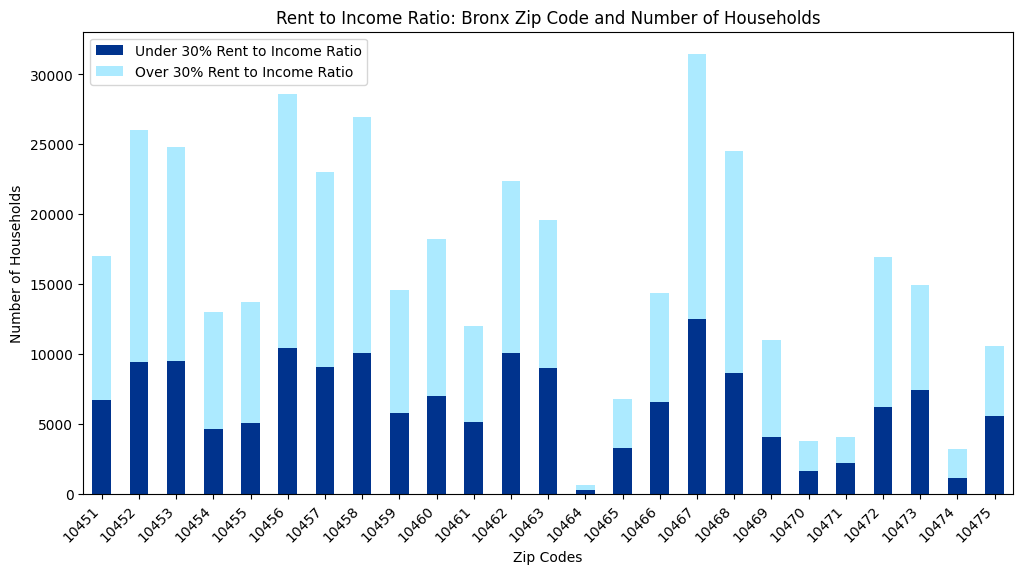

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define income columns to use
rent_to_income_cols1 = ['hh_ratio_10_or_less', 'hh_ratio_10_15', 'hh_ratio_15_20', 'hh_ratio_20_25', 'hh_ratio_25_30']
rent_to_income_cols2 = ['hh_ratio_30_35', 'hh_ratio_35_40', 'hh_ratio_40_50', 'hh_ratio_50_or_more']

# Group by zip code and calculate the mean (average) of chosen columns
grouped_df1 = merged_df.groupby('zcta')[rent_to_income_cols1].agg(np.mean).reset_index()
grouped_df2 = merged_df.groupby('zcta')[rent_to_income_cols2].agg(np.mean).reset_index()

# Define custom colors for the bar chart
colors = ['#00338D', '#ACEAFF']

# Calculate the sums of the two groups of rent-to-income ratios
grouped_df1['group1_sum'] = grouped_df1[rent_to_income_cols1].sum(axis=1)
grouped_df2['group2_sum'] = grouped_df2[rent_to_income_cols2].sum(axis=1)

# Create a new DataFrame to store the sums of the two groups
grouped_sums = pd.DataFrame()
grouped_sums['zcta'] = grouped_df1['zcta']
grouped_sums['group1_sum'] = grouped_df1['group1_sum']
grouped_sums['group2_sum'] = grouped_df2['group2_sum']

# Create a bar chart with the summed rent-to-income ratios for the zip codes, using custom colors
ax = grouped_sums.plot(x='zcta', y=['group1_sum', 'group2_sum'], kind='bar', stacked=True, figsize=(12, 6), color=colors)

# Add labels and a title
plt.xlabel('Zip Codes')
plt.ylabel('Number of Households')
plt.title('Rent to Income Ratio: Bronx Zip Code and Number of Households')

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(['Under 30% Rent to Income Ratio', 'Over 30% Rent to Income Ratio '], loc='upper left')

# Display chart
plt.show()


Population Age Percentage

In [13]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.stats import linregress

# # Define the column mapping for age groups
# age_col_mapping = {
#     'pop_under_25_pct': 'Population Under 25',
#     'pop_25_to_34_pct': 'Population 25 to 34',
#     'pop_35_to_44_pct': 'Population 35 to 44',
#     'pop_45_to_54_pct': 'Population 45 to 54',
#     'pop_55_to_64_pct': 'Population 55 to 64'
# }

# age_cols = list(age_col_mapping.keys())

# # Define the number of rows and columns for the plot matrix  # Change to desired number of rows
# n_rows = 2
# n_cols = 3

# # Create the figure and the plot matrix
# fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 10))

# # Define the color for each age column
# colors = ['#00338D','#00338D','#00338D','#00338D', '#00338D']

# # Iterate through each cell of the plot matrix
# for i in range(n_rows):
#     for j in range(n_cols):
#         # Calculate the index of the age column to use
#         k = i * n_cols + j

#         # Check if the index is valid, i.e., within the range of age_cols and the column has non-null values
#         if k < len(age_cols) and not merged_df[age_cols[k]].isnull().all():
#             # Extract the data for the scatter plot
#             x = merged_df[age_cols[k]]
#             y = merged_df['casthma_crudeprev']
            
#             # Create a scatter plot
#             axs[i, j].scatter(x, y, c=colors[k])

#             # Add label and title for each plot
#             axs[i, j].set_xlabel('Percentage of People (%)')
#             axs[i, j].set_ylabel('Average Asthma Prevalence')
#             axs[i, j].set_title(f'Average Prevalence Asthma vs {age_col_mapping[age_cols[k]]}')

#             # Calculate the coefficients (slope and intercept) for the line of best fit
#             coefficients = np.polyfit(x, y, 1)

#             # Extract the slope from the coefficients
#             slope = coefficients[0]

#             # Calculate the R-squared value
#             slope, intercept, r_value, p_value, std_err = linregress(x, y)
#             r_squared = r_value ** 2
#             print(f'{age_col_mapping[age_cols[k]]}: R-Squared: {r_squared}')

#             # Add the line of best fit to the scatter plot
#             axs[i, j].plot(x, slope * x + intercept, color='#6D2077', label=f'R-squared: {r_squared:.4f}')

#             # Display legend
#             axs[i, j].legend()

# # Adjust the padding between subplots
# fig.tight_layout(pad=2)

# # Display plot
# plt.show()


In [14]:
# import numpy as np
# from scipy.stats import linregress
# import pandas as pd
# import matplotlib.pyplot as plt

# # Define the column mapping for age groups
# age_col_mapping = {
#     'pop_under_25_pct': 'Population Under 25',
#     'pop_55_to_64_pct': 'Population 55 to 64'
# }

# # Define the lowest and highest income range columns
# lowest_age_col = 'pop_under_25_pct'
# highest_age_col = 'pop_55_to_64_pct'

# # Extract the necessary data for the scatter plot
# lowest_age_df = merged_df[merged_df[lowest_age_col].notnull()]
# lowest_age_x = lowest_age_df[lowest_age_col]
# lowest_age_y = lowest_age_df['casthma_crudeprev']

# highest_age_df = merged_df[merged_df[highest_age_col].notnull()]
# highest_age_x = highest_age_df[highest_age_col]
# highest_age_y = highest_age_df['casthma_crudeprev']

# # Create a scatter plot with two colors
# plt.scatter(lowest_age_x, lowest_age_y, color='#1E49E2')
# plt.scatter(highest_age_x, highest_age_y, color='#ACEAFF')

# # Add labels and title to the plot
# plt.xlabel(f'Percentage of Population (%)')
# plt.ylabel('Average Asthma Prevalence')
# plt.title(f'Lowest and Highest Age Range Population: Average Asthma Prevalence')

# # Add R-squared lines for each age range
# slope, intercept, r_value, p_value, std_err = linregress(lowest_age_x, lowest_age_y)
# r_squared = r_value**2
# print(f'Low Age Range R-squared: {r_squared}')
# plt.plot(lowest_age_x, slope * lowest_age_x + intercept, color='#ACEAFF', label=f'{age_col_mapping[lowest_age_col]} (R-squared: {r_squared:.4f})')

# slope, intercept, r_value, p_value, std_err = linregress(highest_age_x, highest_age_y)
# r_squared = r_value**2
# print(f'High Age Range R-squared: {r_squared}')
# plt.plot(highest_age_x, slope * highest_age_x + intercept, color='#1E49E2', label=f'{age_col_mapping[highest_age_col]} (R-squared: {r_squared:.4f})')

# # Display legend outside the plot
# plt.legend()

# # Display plot
# plt.show()


In [15]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Define the column mapping for age groups
# age_col_mapping = {
#     'pop_under_25_pct': 'Population Under 25',
#     'pop_25_to_34_pct': 'Population 25 to 34',
#     'pop_35_to_44_pct': 'Population 35 to 44',
#     'pop_45_to_54_pct': 'Population 45 to 54',
#     'pop_55_to_64_pct': 'Population 55 to 64'
# }

# age_cols = list(age_col_mapping.keys())

# # Group by zip code and calculate the mean (average) of chosen columns
# grouped_df = merged_df.groupby('zcta')[age_cols].agg(np.mean).reset_index()

# # Define custom colors for the bar chart
# colors = ['#00338D', '#ACEAFF', '#1E49E2', '#00B8F5', '#7213EA']

# # Create a bar chart with race percentage of the zip codes, using custom colors
# ax = grouped_df[age_cols].plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

# # Add labels and title
# plt.xlabel('Zip Codes')
# plt.ylabel('Population Percentage')
# plt.title('Age: Bronx Zip Code and Age Range Population Percentage')

# # Set x-tick labels to zip codes of the grouped data
# ax.set_xticklabels(grouped_df['zcta'])

# # Rotate the x-axis labels
# plt.xticks(rotation=45, ha='right')

# # Display legend with the new column names
# plt.legend([age_col_mapping[col] for col in age_cols], bbox_to_anchor=(1.01, 1.0), loc='upper left')

# # Display chart
# plt.show()